In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
file_path = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'

In [45]:
# Inputs:

age_data_list = []
mass_data_list = []
FeHini_data_list = []
alphaMLT_data_list = []
yini_data_list = []
eta_data_list = []
alphaFe_data_list = []

# Outputs:

Teff_data_list = []
LPhot_data_list = []
FeH_data_list = []
Nu_data_list = []
massfin_data_list = []
numax_data_list = []
MeH_data_list = []



with h5py.File(file_path, 'r') as f:
    grid = f['grid']
    tracks = grid['tracks']
    
    selected_tracks = []
    
    
    for track_name in tracks:
        track = tracks[track_name]
        

        # Check if 'massini' dataset exists and is not empty
        if 'massini' in track and track['massini'].size > 0:
            massini_value = track['massini'][()][0]  # Get the first element if it exists
        else:
            massini_value = 0  # Put outside of our desired range so it isn't selected

        # Check if 'alphaMLT' dataset exists and is not empty
        if 'alphaFe' in track and track['alphaFe'].size > 0:
            alphaFe_value = track['alphaFe'][()][0]  # Get the first element if it exists
        else:
            alphaFe_value = 0  # Put outside of our desired range so it isn't selected

        if 'age' in track and track['age'].size > 0:
            age_value = track['age'][()][0]  # Get the first element if it exists
        else:
            age_value = 0  # Put outside of our desired range so it isn't selected

        if 'yini' in track and track['yini'].size > 0:
            yini_value = track['yini'][()][0]  # Get the first element if it exists
        else:
            yini_value = 0  # Put outside of our desired range so it isn't selected

        if 'eta' in track and track['eta'].size > 0:
            eta_value = track['eta'][()][0]  # Get the first element if it exists
        else:
            eta_value = 0  # Put outside of our desired range so it isn't selected

        if 'alphaMLT' in track and track['alphaMLT'].size > 0:
            mlt_value = track['alphaMLT'][()][0]  # Get the first element if it exists
        else:
            mlt_value = 0  # Put outside of our desired range so it isn't selected


        if 0.8 < massini_value < 0.9 and 0.1 < alphaFe_value < 0.3 and 8000 < age_value < 12500 and  0.26 < yini_value < 0.3 and 0.0 < eta_value < 0.15 and 1.55 < mlt_value < 2.1:
            selected_tracks.append(track)
            print(track_name)
            
            # Access and collect the data for each track:

            # Inputs:

            epsilon = 1e-10  # Small constant to handle zero values
            age_data = np.sign(track['age'][:]) * np.log(np.abs(track['age'][:]) + epsilon)
            mass_data = np.sign(track['massini'][:]) * np.log(np.abs(track['massini'][:]) + epsilon)
            FeHini_data = np.sign(track['FeHini'][:]) * np.log(np.abs(track['FeHini'][:]) + epsilon)
            alphaMLT_data = np.sign(track['alphaMLT'][:]) * np.log(np.abs(track['alphaMLT'][:]) + epsilon)
            yini_data = np.sign(track['yini'][:]) * np.log(np.abs(track['yini'][:]) + epsilon)
            eta_data = np.sign(track['eta'][:]) * np.log(np.abs(track['eta'][:]) + epsilon)
            alphaFe_data = np.sign(track['alphaFe'][:]) * np.log(np.abs(track['alphaFe'][:]) + epsilon)
            # Outputs:

            teff_data = track['Teff'][:]
            luminosity_data = track['LPhot'][:]
            FeH_data = track['FeH'][:]
            Nu_data = track['dnufit'][:]
            massfin_data = track['massfin'][:]
            numax_data = track['numax'][:]
            MeH_data = track['MeH'][:]

            print(np.mean(FeH_data))
            
            # Append to lists:

            # Inputs:

            age_data_list.append(age_data)
            mass_data_list.append(mass_data)
            FeHini_data_list.append(FeHini_data)
            alphaMLT_data_list.append(alphaMLT_data)
            yini_data_list.append(yini_data)
            eta_data_list.append(eta_data)
            alphaFe_data_list.append(alphaFe_data)

            # Outputs: 

            Teff_data_list.append(teff_data)
            LPhot_data_list.append(luminosity_data)
            FeH_data_list.append(FeH_data)
            Nu_data_list.append(Nu_data)
            massfin_data_list.append(massfin_data)
            numax_data_list.append(numax_data)
            MeH_data_list.append(MeH_data)

            

print(f"Total selected tracks: {len(selected_tracks)}")


track01239
-0.7915263331895128
track01336
-0.9957584491176222
track04056
-1.8141882448522961
track05064
-1.677536701519354
track05847
-0.4470626647140201
track06168
-1.9935390106463429
track09368
-1.2258937920580362
Total selected tracks: 7


(8000, 7)


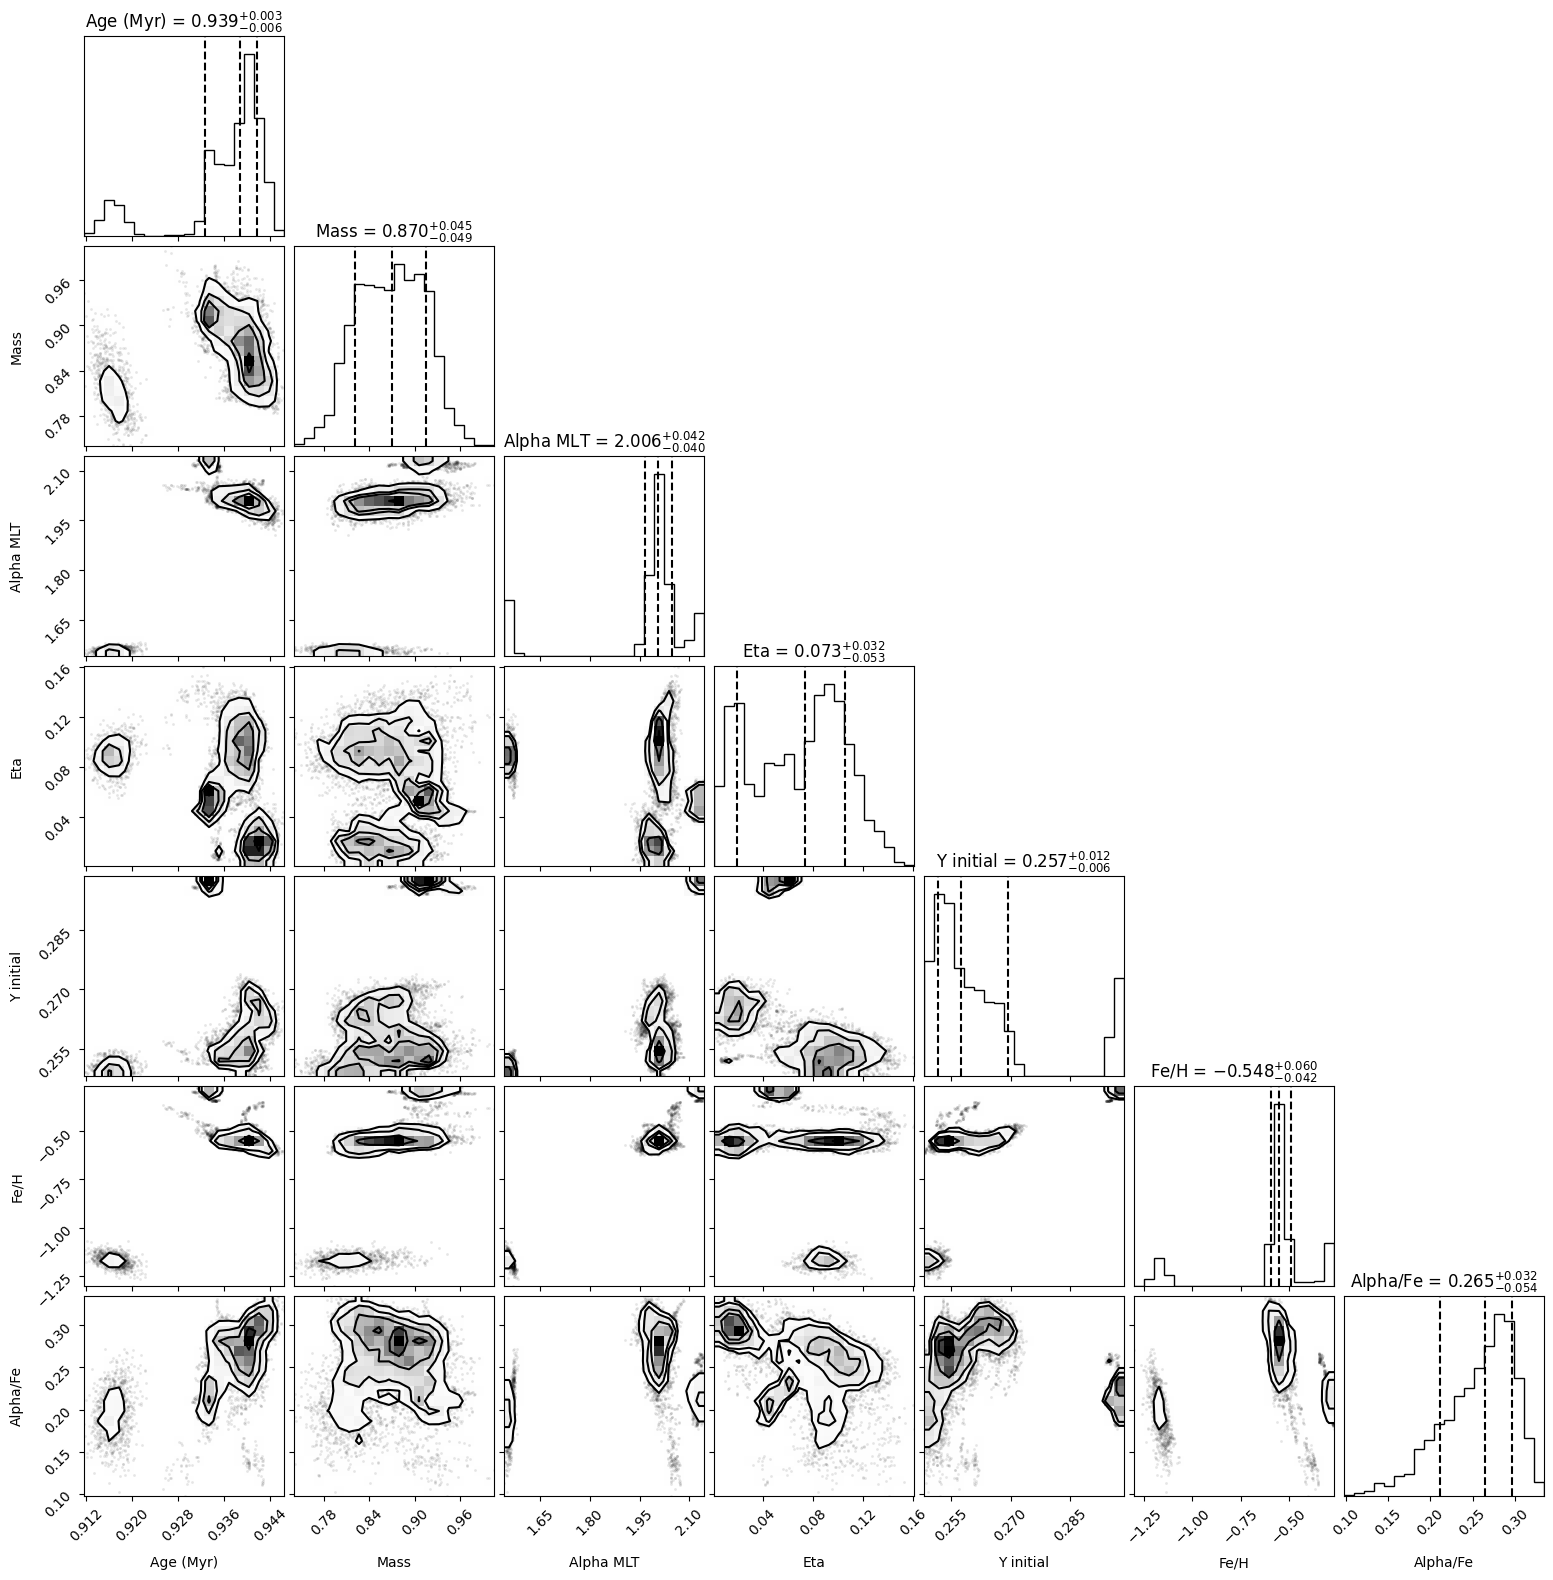

In [ ]:
import corner
import numpy as np
import matplotlib.pyplot as plt


samples = trace.posterior

# Index

i = 18

params_of_interest = {
    'Age (Myr)': samples['ages_norm_'].values.flatten(),
    'Mass': samples['massini_'].values[..., i].flatten(),
    'Alpha MLT': samples['alphamlt_'].values.flatten(),
    'Eta': samples['eta_'].values.flatten(),
    'Y initial': samples['yini_'].values.flatten(),
    'Fe/H': samples['fehini_'].values.flatten(),
    'Alpha/Fe': samples['alphafe_'].values.flatten()
}
# Convert to a numpy array for corner.py
X = np.column_stack([params_of_interest[key] for key in params_of_interest])
print(X.shape)  # Should be (n_samples, n_params)

labels = list(params_of_interest.keys())


fig = corner.corner(
    X, 
    labels=labels,
    quantiles=[0.16, 0.5, 0.84],  
    show_titles=True,
    title_kwargs={"fontsize": 12},
    title_fmt='.3f',
)

plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Dell\AppData\Local\Temp\ipykernel_29016\278271882.py:15: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("Log Luminosity ($log(L_\odot$))")


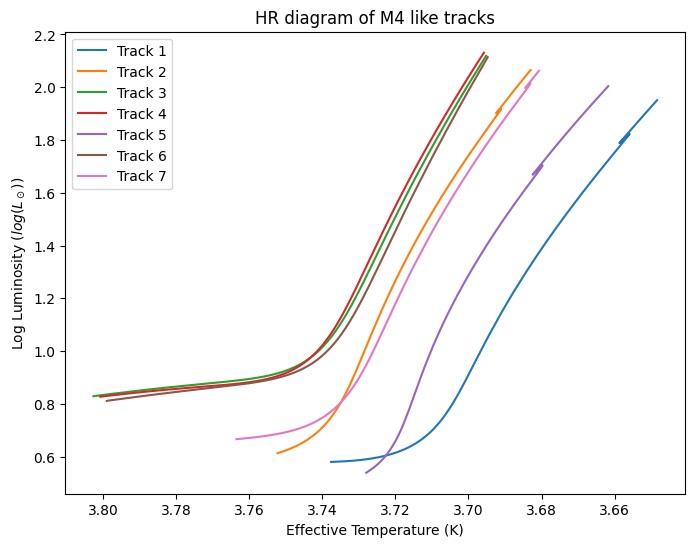

In [7]:
import matplotlib.pyplot as plt

# Create a single figure
plt.figure(figsize=(8, 6))

# Loop through the selected tracks and plot each pair of Teff and LPhot
for i in range(len(selected_tracks)):
    plt.plot(np.log10(Teff_data_list[i]), np.log10(LPhot_data_list[i]), label=f"Track {i+1}")

# Invert x-axis as per your original code
plt.gca().invert_xaxis()

# Add labels and title
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Log Luminosity ($log(L_\odot$))")
plt.title("HR diagram of M4 like tracks")

# Add legend to differentiate tracks
plt.legend()

# Show the plot
plt.show()


In [14]:
# Extract and prepare data

# Windows directory

garstec_data = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'

# 7 Inputs
ages = []
massini = []
fehini = []
alphamlt = []
yini = []
eta = []
alphafe = []

# 5 Outputs (removed massfin, G_GAIA, and MeH)
teff = []
luminosity = []
dnufit = []
FeH = []
numax = []

# Open the hdf5 file (read-only mode)
with h5py.File(garstec_data, 'r') as hdf:
    grid = hdf['grid']
    tracks = grid['tracks']

    # Get a list of track names and shuffle for random sampling
    track_names = list(tracks.keys())
    random.seed(1)
    random.shuffle(track_names)

    # Choose a subset of tracks to process (or not)
    selected_tracks_1000 = track_names[:1000]

    for track_name in selected_tracks_1000:  # Iterate over the selected track names
        track = tracks[track_name]
        # Inputs
        ages.append(track['age'][:])
        massini.append(track['massini'][:])
        fehini.append(track['FeHini'][:])
        alphamlt.append(track['alphaMLT'][:])
        yini.append(track['yini'][:])
        eta.append(track['eta'][:])
        alphafe.append(track['alphaFe'][:])

        # Outputs (removed massfin, G_GAIA, and MeH)
        teff.append(track['Teff'][:])
        luminosity.append(track['LPhot'][:])
        dnufit.append(track['dnufit'][:])
        FeH.append(track['FeH'][:])
        numax.append(track['numax'][:])




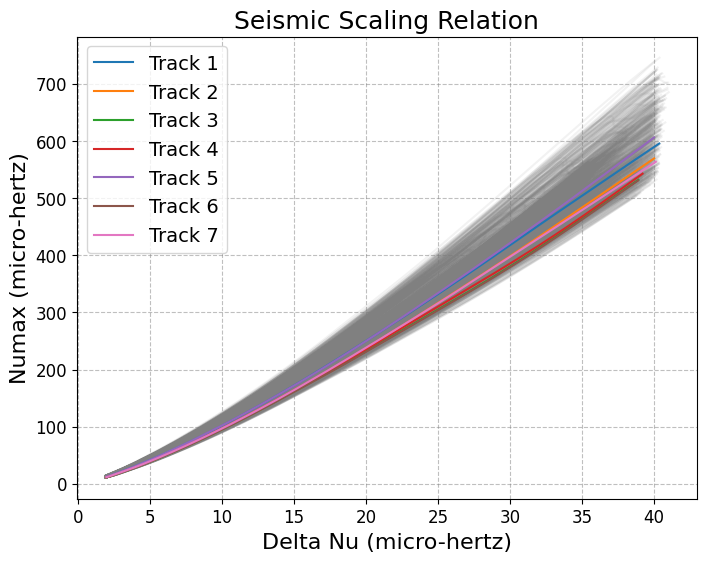

In [29]:

import matplotlib.pyplot as plt
import numpy as np

# Set global font size using rcParams (optional)
plt.rcParams.update({'font.size': 14})  # Increase the font size globally

# Create a single figure
plt.figure(figsize=(8, 6))

# Plot the grey tracks with low opacity
for i in range(len(selected_tracks_1000)):
    plt.plot((dnufit[i]), (numax[i]*3090), color='grey', alpha=0.1)

# Loop through the selected tracks and plot each pair of Teff and LPhot
for i in range(len(selected_tracks)):
    plt.plot((Nu_data_list[i]), (numax_data_list[i]*3090), label=f"Track {i+1}")

# Invert x-axis as per your original code

# Add labels and title with larger font size
plt.xlabel("Delta Nu (micro-hertz)", fontsize=16)
plt.ylabel("Numax (micro-hertz)", fontsize=16)
plt.title("Seismic Scaling Relation", fontsize=18)

plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Increase font size of legend
plt.legend(fontsize=14)

# Increase font size of tick labels (x and y axis ticks)
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.show()



In [43]:
import json
import os
from itertools import product
from pathlib import Path
from typing import List, Tuple, Union

import corner
import jax
import keras
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf
import numpyro
import arviz

# Function to print version info
def print_versions():
    versions = {
        "json": "Built-in",
        "os": "Built-in",
        "itertools": "Built-in",
        "pathlib": "Built-in",
        "typing": "Built-in",
        "corner": corner.__version__,
        "jax": jax.__version__,
        "jaxlib": jax.lib.__version__,
        "keras": keras.__version__,
        "matplotlib": matplotlib.__version__,
        "numpy": np.__version__,
        "pandas": pd.__version__,
        "seaborn": sns.__version__,
        "sklearn": sklearn.__version__,
        "tensorflow": tf.__version__,
        "Numpyro": numpyro.__version__,
        "Arviz": arviz.__version__
    }

    print("\n📦 Installed Library Versions:")
    for lib, version in versions.items():
        print(f"{lib}: {version}")

# Run the function
print_versions()



📦 Installed Library Versions:
json: Built-in
os: Built-in
itertools: Built-in
pathlib: Built-in
typing: Built-in
corner: 2.2.3
jax: 0.4.38
jaxlib: 0.4.38
keras: 3.9.0
matplotlib: 3.10.0
numpy: 2.1.3
pandas: 2.2.3
seaborn: 0.13.2
sklearn: 1.6.1
tensorflow: 2.19.0
Numpyro: 0.16.1
Arviz: 0.20.0
